<a href="https://colab.research.google.com/github/ashbyp/alecto/blob/master/notebooks/momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import pandas as pd
import numpy as np
import yfinance as yf

In [26]:
nasdaq = pd.read_html('https://en.wikipedia.org/wiki/Nasdaq-100')[4]
nasdaq_tickers = nasdaq.Ticker.to_list()
print(nasdaq_tickers)
print(len(nasdaq_tickers))


['ATVI', 'ADBE', 'ADP', 'ABNB', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'AZN', 'TEAM', 'ADSK', 'BKR', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CHTR', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CEG', 'CPRT', 'CSGP', 'COST', 'CRWD', 'CSX', 'DDOG', 'DXCM', 'FANG', 'DLTR', 'EBAY', 'EA', 'ENPH', 'EXC', 'FAST', 'FISV', 'FTNT', 'GILD', 'GFS', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LCID', 'LULU', 'MAR', 'MRVL', 'MELI', 'META', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'ODFL', 'PCAR', 'PANW', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'RIVN', 'ROST', 'SGEN', 'SIRI', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZM', 'ZS']
101


In [27]:
prices = yf.download(nasdaq_tickers, start="2009-01-01")['Adj Close']#.dropna(axis=1)
prices


[*********************100%***********************]  101 of 101 completed


,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,2.762746,NaN,23.020000,13.858873,25.052759,20.680000,19.485905,8.890000,8.282957,2.380000,...,NaN,11.308820,NaN,30.690001,17.748911,7.485948,NaN,11.481795,NaN,NaN
2009-01-05,2.879346,NaN,23.129999,13.788416,24.798563,20.879999,19.308235,9.250000,8.282957,2.670000,...,NaN,11.181910,NaN,32.150002,18.645046,7.562596,NaN,11.372091,NaN,NaN
2009-01-06,2.831854,NaN,24.219999,14.457761,25.300735,20.850000,18.975832,9.600000,8.989374,2.780000,...,NaN,11.597885,NaN,31.629999,18.554737,7.659683,NaN,11.225827,NaN,NaN
2009-01-07,2.770662,NaN,24.230000,13.915236,24.866756,20.070000,18.769508,9.360000,8.228617,2.660000,...,NaN,10.984499,NaN,31.520000,18.777033,7.439959,NaN,11.110034,NaN,NaN
2009-01-08,2.822112,NaN,24.290001,13.929328,25.176737,19.200001,19.073252,9.010000,8.337295,2.740000,...,NaN,10.772988,NaN,31.770000,18.645046,7.705672,NaN,11.256300,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,85.250000,338.450012,163.839996,240.940002,188.160004,95.690002,203.669998,97.220001,64.519997,...,123.150002,164.380005,175.610001,289.690002,38.630001,9.170000,164.639999,70.446365,65.889999,108.779999
2022-12-27,130.029999,83.489998,335.089996,162.199997,241.029999,186.289993,96.290001,204.589996,95.339996,63.270000,...,109.099998,163.779999,175.559998,287.320007,38.310001,9.230000,163.399994,71.082001,65.459999,107.570000
2022-12-28,126.040001,82.489998,328.329987,160.279999,237.850006,181.899994,95.360001,201.580002,94.230003,62.570000,...,112.709999,161.190002,174.229996,285.760010,37.580002,8.870000,162.990005,70.570000,65.360001,107.860001


In [28]:
mtl = (prices.pct_change() +1) [1:].resample('M').prod()
#prices.head(4)
mtl.head()
#1 + ((2.879346 - 2.762747) / 2.762747)


,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,0.993168,1.0,0.838836,1.015760,0.899034,0.800774,0.922059,0.886389,0.878163,0.920168,...,1.0,0.938790,1.0,1.076898,1.072798,0.989761,1.0,0.979830,1.0,1.0
2009-02-28,0.990902,1.0,0.864837,0.932933,0.939995,0.766304,0.905780,0.869289,0.988740,0.995434,...,1.0,0.959866,1.0,0.911952,0.874145,1.069655,1.0,0.960997,1.0,1.0
2009-03-31,1.177024,1.0,1.280838,1.045259,1.039486,1.324665,0.900535,1.157664,1.167210,1.399083,...,1.0,1.150522,1.0,0.953218,1.088013,1.032882,1.0,1.063656,1.0,1.0
2009-04-30,1.197013,1.0,1.278635,1.104308,1.001138,1.186199,1.044339,1.564943,1.135814,1.183607,...,1.0,1.100814,1.0,1.072746,1.210709,1.185393,1.0,0.989802,1.0,1.0
2009-05-31,1.079313,1.0,1.030347,1.156865,1.079829,1.076229,1.014050,0.953264,0.926916,1.257618,...,1.0,1.074197,1.0,0.965931,0.951322,1.182201,1.0,0.930043,1.0,1.0


In [29]:
def get_rolling_ret(df, n):
    return df.rolling(n).apply(np.prod)


m12 = get_rolling_ret(mtl, 12)
m6 = get_rolling_ret(mtl, 6)
m3 = get_rolling_ret(mtl, 3)

m12


,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.041303,0.729854,0.562664,0.946937,1.191276,0.650585,1.157029,0.343724,0.702024,0.766528,...,1.123838,0.888249,0.933506,1.406760,0.721295,0.459085,0.602431,1.110465,0.277720,0.572106
2022-09-30,0.982151,0.626170,0.478010,0.847208,1.152495,0.655048,1.101425,0.311242,0.641824,0.615743,...,1.026139,0.826544,0.857102,1.596229,0.696798,0.453113,0.609148,1.052538,0.281415,0.626840
2022-10-31,1.029367,0.626450,0.489729,0.837111,1.096734,0.674727,1.073475,0.311194,0.651560,0.499543,...,0.612765,0.881011,0.875221,1.687125,0.810489,0.554607,0.537347,1.036144,0.303805,0.483284


In [30]:
top_50 = m12.loc['2022-11-30'].nlargest(50)
top_50_tickers = top_50.index

top_50

CEG     2.309394
VRTX    1.692522
AMGN    1.485550
FANG    1.479960
TMUS    1.391968
ORLY    1.354739
GILD    1.334797
PCAR    1.310879
BIIB    1.294519
ENPH    1.282360
BKR     1.276064
ATVI    1.269446
AZN     1.269053
AEP     1.235272
PDD     1.233684
MNST    1.227739
KHC     1.220107
PEP     1.192713
REGN    1.180934
MDLZ    1.174004
ADP     1.165335
KDP     1.161559
EXC     1.135169
XEL     1.132543
MAR     1.127462
DLTR    1.122992
SIRI    1.119664
HON     1.108047
CTAS    1.105206
ROST    1.093193
FISV    1.081227
PAYX    1.067345
EA      1.060202
CSGP    1.042181
AVGO    1.025238
COST    1.006448
SNPS    0.995719
BKNG    0.989343
KLAC    0.975851
ADI     0.971187
CDNS    0.969458
WBA     0.969197
MCHP    0.964857
TXN     0.964613
CSX     0.954904
SBUX    0.954295
CSCO    0.935096
PANW    0.931912
GFS     0.929376
CPRT    0.917057
Name: 2022-11-30 00:00:00, dtype: float64

In [31]:
def get_top(d):
    top_50 = m12.loc[d].nlargest(50).index
    top_30 = m6.loc[d, top_50].nlargest(30).index
    top_10 = m3.loc[d, top_30].nlargest(10).index
    return top_10

top = get_top('2010-12-31')
top

Index(['NXPI', 'LULU', 'SIRI', 'BKR', 'FTNT', 'ASML', 'ILMN', 'AVGO', 'SBUX',
       'ODFL'],
      dtype='object')

In [32]:
top = get_top('2022-12-31')
top

Index(['DXCM', 'GILD', 'ROST', 'PDD', 'HON', 'AVGO', 'KLAC', 'KHC', 'BKNG',
       'PCAR'],
      dtype='object')

In [33]:
def portfolio_performance(d):
  port = mtl.loc[d:,get_top(d)][1:2]
  return port.mean(axis=1).values[0]

p = portfolio_performance('2010-12-31')
p

1.0802358873132039

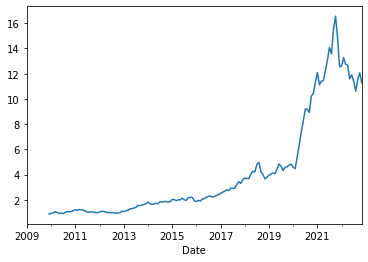

In [34]:
returns = []

for d in mtl.index[:-1]:
  # print(f'Try {d} {type(d)} {str(d.date())}')
  returns.append(portfolio_performance(d))#str(d.date())))

# 1% trading costs
pd.Series([i - 0.01 for i in returns], index=mtl.index[:-1]).cumprod().plot()





[*********************100%***********************]  1 of 1 completed


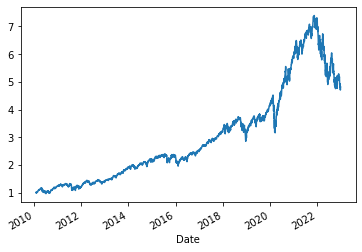

In [35]:
nasdaq = yf.download('^IXIC', start='2010-01-31')

(nasdaq['Adj Close'].pct_change() + 1).cumprod().plot()


In [38]:
old = None
from collections import Counter
c = Counter()
for d in mtl.index[:-1:1]:
  new = set(sorted(get_top(d).to_list()))
  c.update(new)
  buy = None
  sell = None
  retain = None

  if not old:
    retain = new
  else:
    buy = new.difference(old)
    sell = old.difference(new)
    retain = new.intersection(old)

  print(f'{d}: Buy:{buy}, Sell:{sell}, Retain:{retain}')
  old = new


  print(c)

2009-01-31 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-02-28 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-03-31 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-04-30 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-05-31 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-06-30 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-07-31 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-08-31 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-09-30 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-10-31 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-11-30 00:00:00: Buy:None, Sell:None, Retain:set()
Counter()
2009-12-31 00:00:00: Buy:None, Sell:None, Retain:{'MRVL', 'GOOG', 'AMZN', 'AMD', 'LULU', 'ALGN', 'REGN', 'BKNG', 'MU', 'MELI'}
Counter({'MRVL': 1, 'GOOG': 1, 'AMZN': 1, 'AMD': 1, 'LULU': 1, 'ALGN': 1, 'REGN': 1, 'BKNG': 1, 'MU': 1, 'MELI': 1})
2010-01-31 00:00:00: Buy:{'NVDA', 'DXCM',